# K-means算法案例1
- 使用随机生成的数据训练模型
- 考查不同K值时的聚类效果

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

- 随机生成数据，使用make_blobs生成2个特征的数据集，200个样例

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, #200个样例
                  n_features=2, #特征个数为2
                  centers=4,    #以4个点为中心生成数据
                  cluster_std=1, #数据标准差为1
                  center_box=(-10.0, 10.0),#随机生成中心时每个聚类中心的边界。
                  shuffle=True, # 随机打乱数据
                  random_state=1);

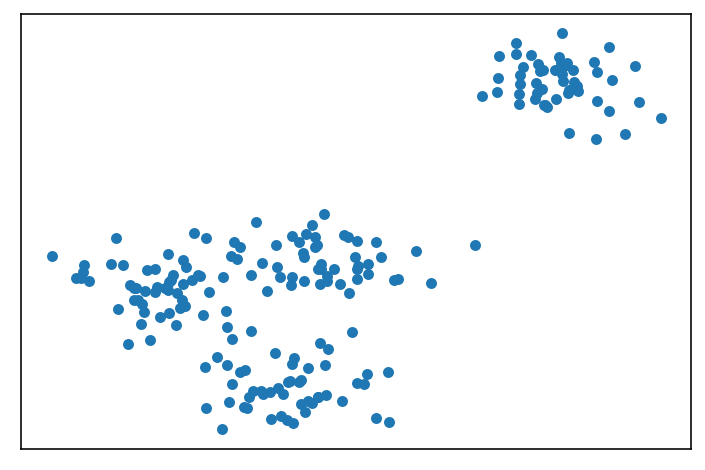

In [3]:
plt.figure(figsize=(6,4), dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o');

## 1. 考查聚成3类时候的效果
- 使用sklearn.cluster中的KMeans构建模型，需要指定群个数（K值）；
- sklearn用kmean.score表示K均值聚类的成本值，用负数表示，绝对值越大，成本越高。物理意义为训练样例到其所属的聚类中心的距离平均值或者距离总和。

In [4]:
from sklearn.cluster import KMeans

n_clusters = 3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X);
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(X)))) #cost是拟合成本

kmean: k=3, cost=-668


- 画出聚类结果，同时标出中心点

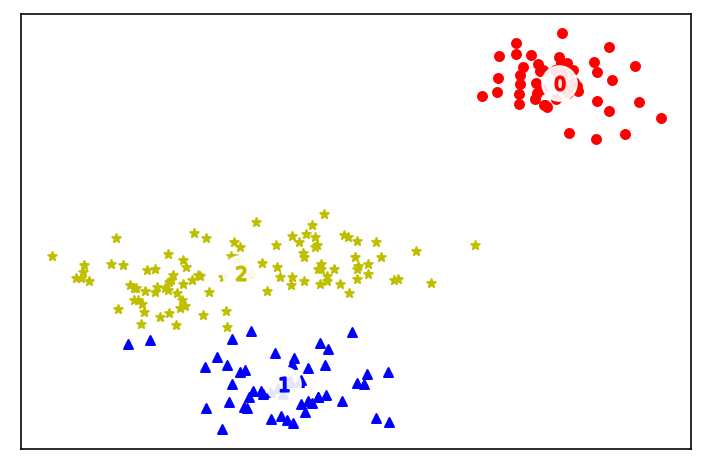

In [5]:
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o', '^', '*'] #将不同的类别标记成不同的形状
colors = ['r', 'b', 'y'] # 将不同的类别标记成不同的颜色

plt.figure(figsize=(6,4), dpi=144)
plt.xticks(())
plt.yticks(())

# 画样本
for c in range(n_clusters):
    cluster = X[labels == c]
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                marker=markers[c], s=20, c=colors[c])
# 画出中心点
plt.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

## 2.考查不同K值的效果

- 定义画出不同K值时聚类效果的画图模块，考虑K=2,3,4时的聚类分群结果

In [8]:
def fit_plot_kmean_model(n_clusters, X):
    plt.xticks(())
    plt.yticks(())

    # 使用 k-均值算法进行拟合
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(X)

    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o', '^', '*', 's','<']
    colors = ['r', 'b', 'y', 'k',"g"]

    # 计算成本
    score = kmean.score(X)
    plt.title("k={}, score={}".format(n_clusters, (int)(score)))

    # 画样本
    for c in range(n_clusters):
        cluster = X[labels == c]
        plt.scatter(cluster[:, 0], cluster[:, 1], 
                    marker=markers[c], s=20, c=colors[c])
    # 画出中心点
    plt.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=0.9, s=300)
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

- 考查K=2,3,4时候的聚类结果

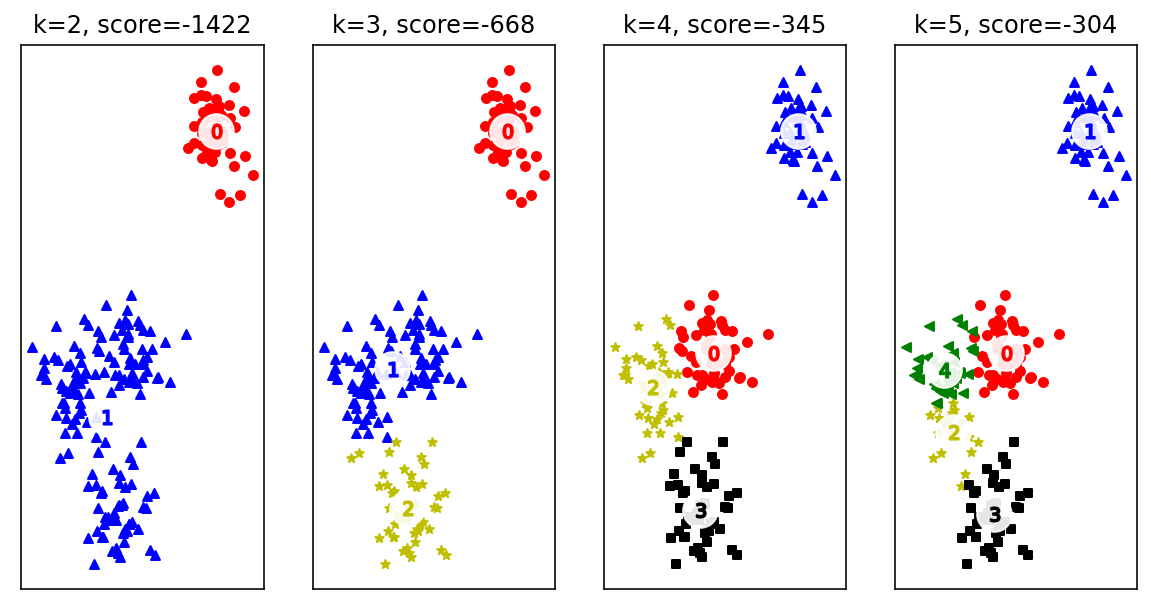

In [9]:
from sklearn.cluster import KMeans

n_clusters = [2, 3, 4,5]

plt.figure(figsize=(10, 5), dpi=144)
for i, c in enumerate(n_clusters):
    plt.subplot(1, 4 , i + 1)
    fit_plot_kmean_model(c, X)